# BE1: k-NN, Decision trees and Ensemble Methods
> by [Yohann De Castro](https://ydecastro.github.io/)

# Nearest Neighbors principle

Given a training dataset $\{(X_1, Y_1), \dots, (X_n, Y_n)\}$, the k-nearest neighbors classification consists in predicting, for $x \in \mathbb R^d$, the majority vote of the k-nearest neighbors of $x$. Formally, the predicted class is given by
$$
    h(x) \in \arg\max_{y \in \mathcal Y} \sum_{j=1}^k \mathbb 1_{Y_{(i)}=y},
$$
where the ranked labeled $\{Y_{(1)}, \dots, Y_{(n)}\}$ are such that $\|X_{(1)}-x\| \le \dots \le \|X_{(n)}-x\|$.

Below, some examples on Iris/Wine data set from Scikit Learn. 

> When do we observe under/overfitting?

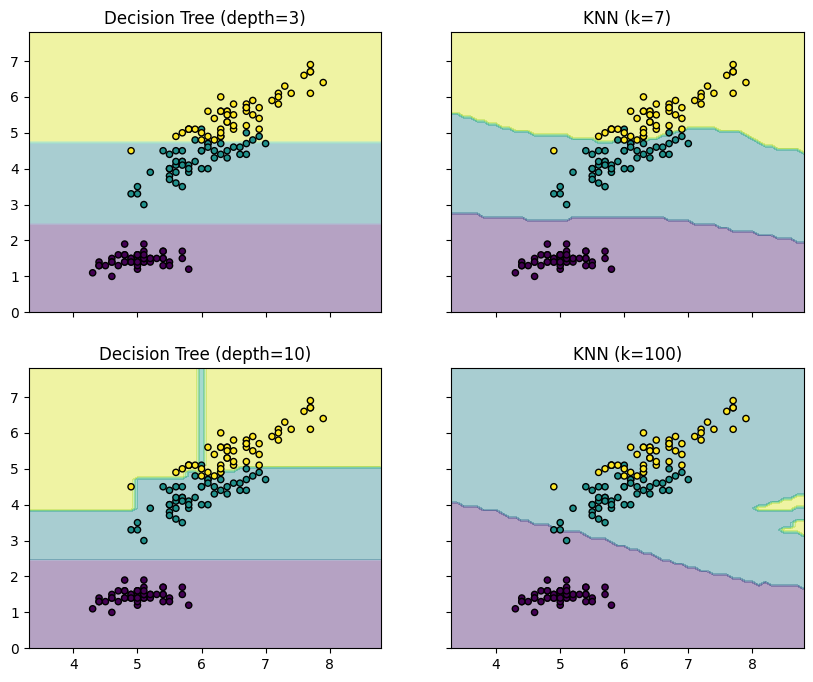

In [3]:
# Training classifiers
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=3)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = DecisionTreeClassifier(max_depth=10)
clf4 = KNeighborsClassifier(n_neighbors=100)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0,1]),
                        [clf1, clf2, clf3, clf4],
                        ['Decision Tree (depth=3)', 'KNN (k=7)', 'Decision Tree (depth=10)', 'KNN (k=100)']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

# Risk on the test set

> Plot the test risk for various values of the tunning parameters using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Text(0.5, 1.0, 'Test accuracy kNN')

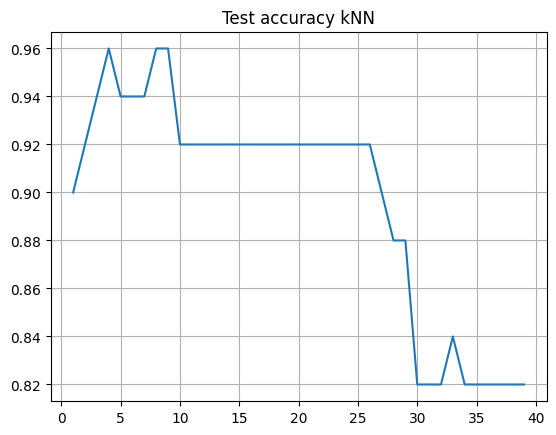

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

k_values = np.arange(1, 40)

# Answer:
score = []
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))
    
plt.plot(k_values, score)
plt.grid()
plt.title("Test accuracy kNN")

# The Cross-Validation procedure

Using the [crossval\_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function, find (and print) a good value for the number of nearest neighbors.

For this parameter, compare the crossvalidation score and the test accuracy.

In [10]:
from sklearn.model_selection import cross_val_score

# Answer
score = []
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k) 
    score.append(cross_val_score(clf, X_train, y_train).mean())
    
ik = np.argmax(score)
n_neighbors = ik + 1
clf = KNeighborsClassifier(n_neighbors=n_neighbors)
clf.fit(X_train, y_train)

print("Neighbors:", n_neighbors)
print("Crossval score:", score[ik])
print("Test accuracy:", clf.score(X_test, y_test))

Neighbors: 1
Crossval score: 0.95
Test accuracy: 0.9


# The Confusion matrix

Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another).

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_pred, y, classes=None, normalize=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    title='Confusion matrix'
    cmap=plt.cm.Blues
    
    cm = confusion_matrix(y, y_pred)
    
    if classes is None:
        classes = np.unique(y)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Unnormalized confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

> Compute the confusion matrix

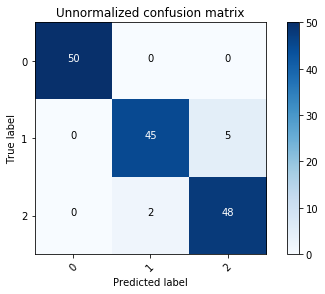

In [ ]:
# Answer
y_pred = # Put your answer here 
plot_confusion_matrix(y_pred, y)

# On synthetic data
We will generate a dataset and try to learn form it. The next cell is the generating process, using [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for sklearn.

In [ ]:
from matplotlib import cm

def plotXY(X, Y):
    if Y.ndim > 1:
        X1 = X
        X2 = Y
        XX = np.concatenate((X, Y), axis=0)
        YY = np.concatenate((np.ones(X.shape[0]), -np.ones(Y.shape[0])))
    else:
        XX = X
        YY = Y
    for cl in np.unique(Y):
        plt.scatter(XX[YY==cl, 0], XX[YY==cl, 1])
    
def map_regions(clf, data=None, num=200):
    """
        Map the regions f(x)=1…K of the classifier clf within the same range as the one
        of the data.
        Input:
            clf: classifier with a method predict
            data: input data (X)
            num: discretization parameter
    """
    xmin, ymin = data.min(axis=0)
    xmax, ymax = data.max(axis=0)
    x, y = np.meshgrid(np.linspace(xmin, xmax, num), np.linspace(ymin, ymax))
    z = clf.predict(np.c_[x.ravel(), y.ravel()]).reshape(x.shape)
    zmin, zmax = z.min(), z.max()
    plt.imshow(z, origin='lower', interpolation="nearest",
               extent=[xmin, xmax, ymin, ymax], cmap=cm.coolwarm,
              alpha=0.3)

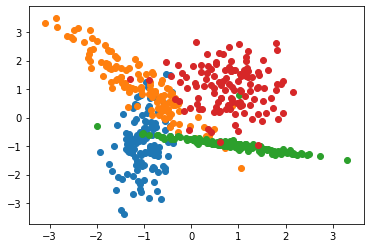

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_classes=4,
                           n_features=2, n_redundant=0, n_clusters_per_class=1)
plotXY(X, y)

# Decision trees
We recall the properties of a Decision Tree below.

Decision trees, and in particular classification and regression trees (CART), are supervised estimators introduced by Leo Breiman et al.
The paradigm of a binary decision tree is to recursively split the space $\mathcal X$ with simple rules such that: is the explicative variable $x_j$ greater than the threshold $\tau$ or not?
Doing so, a decision tree is built, for which each node corresponds to a simple rule (and secondarly to a partition cell of $\mathcal X$).
The final result is a partition of $\mathcal X$ by hypercubes.

At each step of the learning algorithm, 

1. consider the partition $\mathcal P = \{\mathcal X\}$;
1. for each cell $\mathcal A$ of $\mathcal P$, define the two-cell partition
$\mathcal A = \mathcal L_{j, \tau} \cup \mathcal R_{j, \tau}$, where $j \in [d]$ is a feature index and $\tau \in \mathbb R$ is a threhold, and
$$
    \begin{cases}
        \mathcal L_{j, \tau} = \left\{ x \in \mathcal A :  x_j \le \tau \right\}\\
        \mathcal R_{j, \tau} = \left\{ x \in \mathcal A :  x_j > \tau \right\}
        %= \mathcal A \backslash \mathcal L_{j, \tau}.
    \end{cases}
$$
are the "left" and "right" parts of $\mathcal A$.
Then, find the best pair (feature, threhold) for splitting:
$$
    (j, \tau) \in \operatorname{arg\,min}_{1 \le j \le d \atop \tau \in \mathbb R}
    \frac{\left| \mathcal L_{j, \tau} \right|}{\left| \mathcal A \right|} D(\mathcal L_{j, \tau}) +
    \frac{\left| \mathcal R_{j, \tau} \right|}{\left| \mathcal A \right|} D(\mathcal R_{j, \tau})
$$
where $D$ is a distortion measure for a cell (see below);
1. replace $\mathcal A$ by $\mathcal L_{j, \tau}$ and $\mathcal R_{j, \tau}$ in the partition $\mathcal P$;
1. go to 2.

Given a cell $\mathcal A$, one may define the ratio of observations of $\mathcal A$ of class $y \in \mathcal Y$:
$$
    p_y(\mathcal A) = \frac{\left| \left\{ i \in [n] : X_i \in \mathcal A, Y_i=y \right\} \right|}{\left| \mathcal A \right|}.
$$

Then, the distortion of the cell $\mathcal A$ may be:
- Gini impurity: $D(\mathcal A) = \sum_{y \in \mathcal Y} p_y(\mathcal A) (1-p_y(\mathcal A))$ (classification);
- entropy: $D(\mathcal A) = - \sum_{y \in \mathcal Y} p_y(\mathcal A) \log(p_y(\mathcal A))$ (classification);
- mean squared error: $D(\mathcal A) = \frac{1}{\left| \mathcal A \right|}\sum_{1 \le i \le n \atop X_i \in \mathcal A} \left( Y_i - \bar Y_{\mathcal A} \right)^2$, with $\bar Y_{\mathcal A} = \frac{1}{\left| \mathcal A \right|}\sum_{1 \le i \le n \atop X_i \in \mathcal A} Y_i$ (regression).

For regression, Jerome Friedman suggested an improved criterion (in its original paper tackling gradient boosting), referred to as Friedman's mean squared error:
$$
    (j, \tau) \in \operatorname{arg\,min}_{1 \le j \le d \atop \tau \in \mathbb R}
    \frac{ \left| \mathcal L_{j, \tau} \right| \left| \mathcal R_{j, \tau} \right| }{ \left| \mathcal L_{j, \tau} \right| + \left| \mathcal R_{j, \tau} \right| }
    \left( \bar Y_{\mathcal L_{j, \tau}} - \bar Y_{\mathcal R_{j, \tau}} \right)^2.
$$

Last but not least, several stopping rules are of interests:
- maximal depth of the tree;
- minimal number of observations required to split an internal node;
- minimal number of observations required to be at a leaf node;
- maximal number of leaf nodes.

We would like to assess the accuracy of a [classification tree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with respect to the kind of splitting criterion (Gini impurity or entropy) and to the maximal depth allowed.

For this purpose, fit a [classification tree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on the previous dataset and plot 4 curves depicting the classification error for:
1. the train set and the Gini impurity;
1. the test set and the Gini impurity;
1. the train set and the entropy;
1. the test set and the entropy.

> What can you conclude based on this numerical experiment?

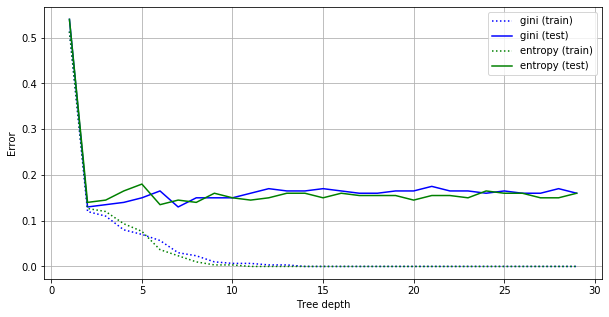

In [ ]:
# Answer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


depths = np.arange(1, 30)
criteria = ["gini", "entropy"]

train_err = []
test_err = []
for criterion in criteria:
    train_err.append([])  # New criteria => new list
    test_err.append([])
    for depth in depths:
        clf = # Put your answer here 
        clf.fit# Put your answer here 
        train_err[-1].append(1-clf.score(X_train, y_train))
        test_err[-1].append(1-clf.score(X_test, y_test))
        
plt.figure(figsize=(10, 5))
colors = "bgrc"
for ic, criterion in enumerate(criteria):
    plt.plot(depths, train_err[ic], color=colors[ic], linestyle=':',
             label=criterion+" (train)")
    plt.plot(depths, test_err[ic], color=colors[ic], linestyle='-',
             label=criterion+" (test)")
plt.xlabel("Tree depth")
plt.ylabel("Error")
plt.grid()
plt.legend(loc="best")

Map the regions of the "best" (with respect to the test error) decision tree obtained with the Gini impurity.

Best depth for gini criterion: 2.
Test error: 0.13


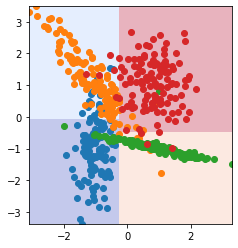

In [ ]:
# Answer
criterion = "gini"
ic = np.where([c == criterion for c in criteria])[0][0]  # Index for gini impurity
idepth = # Put your answer here   # Index for best depth
depth = # Put your answer here   # Best depth
print("Best depth for {} criterion: {}.".format(criterion, depth))

# Fit the classifier with the best depth
clf = # Put your answer here 
# Put your answer here 
print("Test error:", 1-clf.score(X_test, y_test))

plotXY(X, y)
map_regions(clf, X)

## Bagging

Bagging is a portmanteau word for *bootstrap aggregating*.
The paradigm of bagging is to train independently several base classifiers $(g_1, \dots, g_T)$, with $g_t \colon \mathbb R^d \to \{\pm 1\}$, and to build a new classifier by averaging the predictions of the base classifiers:
$$
    g_n^T(x) = \operatorname{sign} \left( \frac{1}{T} \sum_{t=1}^T g_t(x) \right).
$$
Doing so, the variance of the prediction is reduced and so it is for the global error.
The requirements for such a result are:
- base classifiers should be more accurate than chance;
- base classifiers should be estimated independently from each other.

In practice, base classifiers are trained *quasi-independently* by bootstrapping the training set.

Bagging is also valid for multiclass problems: for $C$ classes, the prediction is:
$$
    g_n^T(x)
    = \operatorname{arg\,max}_{1 \le j \le C} \frac{1}{T} \sum_{t=1}^T g_t(x) \mathbb 1_{g_t(x)=j}
    = \operatorname{arg\,max}_{1 \le j \le C} \operatorname{card} \left( \left\{ t \in [T] : g_t(x) \mathbb 1_{g_t(x)=j} \right\} \right),
$$
where $g_t \colon \mathbb R^d \to [C]$, which corresponds to the majority vote since base classifiers are equally weighted.

Finally, one may also bag regressors $g_t \colon \mathbb R^d \to \mathbb R$ by a simple averaging:
$$
    g_n^T(x) = \frac{1}{T} \sum_{t=1}^T g_t(x).
$$

Assume that we are provided with a sequence of independent classifiers $(g_1, \dots, g_T)$, with $g_t \colon \mathbb R^d \to \{\pm 1\}$, such that classifiers are equally good: there exists $p>0.5$ such that $\mathbb P(g_t(X)=Y) = p$ for all $t \in [T]$.
We now consider the bagged classifier
$$
    g_n^T(x) = \operatorname{sign} \left( \frac{1}{T} \sum_{t=1}^T g_t(x) \right).
$$
What is the distribution of the random variable $\sum_{t=1}^T \mathbb 1_{g_t(X)=Y}$?
Plot its probability mass function for $T=9$ and $p=0.7$.

**Answer**

# Put your answer here 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


<StemContainer object of 3 artists>

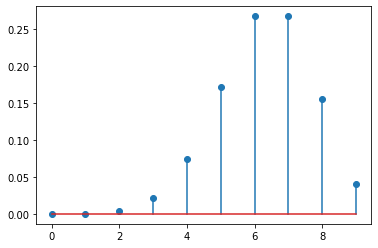

In [ ]:
# Answer
from scipy.stats import binom

T, p = 9, 0.7
rv = binom(T, p)
pmf = # Put your answer here 

plt.stem(pmf)

For these particular values of $T$ and $p$, compute numerically $\mathbb P(g_n^T(X)=Y)$.

**Answer**

# Put your answer here 

In [ ]:
# Answer
# Put your answer here 

Probability of success of the bagged classifier: 0.9011913399999991


Plot the probability of success (or accuracy) with respect to the number of base classifiers for $p \in [0.55, 0.65, \dots, 0.95]$.
Be careful, the formula used previously is only valid for odd numbers of base classifiers.

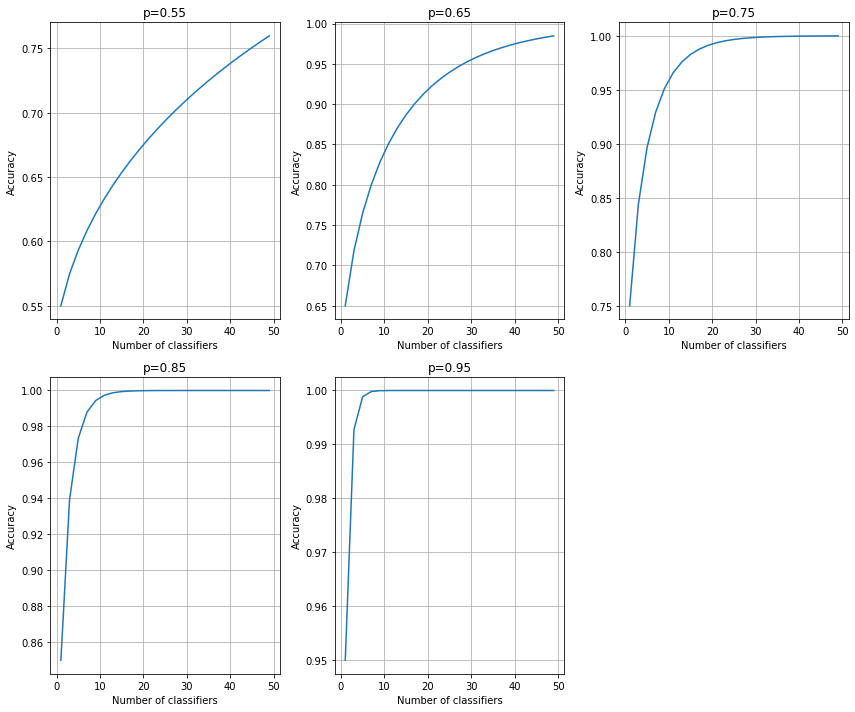

In [ ]:
# Answer
Ts = np.arange(1, 50, step=2)

plt.figure(figsize=(12, 10))
for it, p in enumerate(np.arange(0.55, 1, step=0.1)):
    success = # Put your answer here 
    plt.subplot(2, 3, it+1)
    plt.plot(Ts, success)
    plt.xlabel("Number of classifiers")
    plt.ylabel("Accuracy")
    plt.title("p={}".format(p))
    plt.grid()
plt.tight_layout()

Complete the following script to implement bagging with regression trees.

In [ ]:
class BaggingTree(object):
    def __init__(self, n_estimators=10, max_depth=1, max_samples=1.0):
        """
        Parameters:
        - n_estimators: number of estimators
        - max_depth: maximal depth of the regressor tree
        - max_samples: ratio of samples to use for learning base regressors.
            - If max_samples=1.0: use bootstrap.
            - If max_samples<1.0: use random sampling and extract max_samples x n points
            (where n is the total numer of points).
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_samples = max_samples
        
    def fit(self, X, y):
        # Make X a 2d-array
        X = np.asarray(X)
        if X.ndim == 1:
            X = X[:, np.newaxis]
            
        n = X.shape[0]  # Sample size
        m = int(self.max_samples * n)  # Number of points for random sampling
        
        self.estimators_ = []
#        for t in …
#            if self.max_samples==1:
#                idx = np.random.randint…  # Bootstrap
#            else:
#                idx = np.random.permutation…  # Random sampling
#            self.estimators_.append(…)
#            self.estimators_[-1].fit(…)
    
    def predict(self, X):
        # Make X a 2d-array
        X = np.asarray(X)
        if X.ndim == 1:
            X = X[:, np.newaxis]
        
#        y = [… for reg in self.estimators_]
#        return np.asarray(…)…
    
    def error(self, X, y):
        # Make X a 2d-array
        X = np.asarray(X)
        if X.ndim == 1:
            X = X[:, np.newaxis]
        return np.sum((y - self.predict(X))**2)

Apply bagging to the following regression dataset and plot (on the same figure), the training data and the prediction for test data.

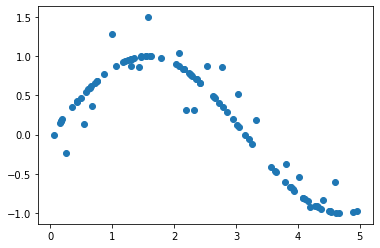

In [ ]:
# Regression dataset
n = 100
X_train = np.sort(5 * np.random.rand(n))
y_train = np.sin(X_train)
y_train[::5] += 1 * (0.5 - np.random.rand(n//5))

X_test = np.arange(0, 5, step=1e-2)
y_test = np.sin(X_test)

# Make 2d-arrays
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

plt.scatter(X_train, y_train)

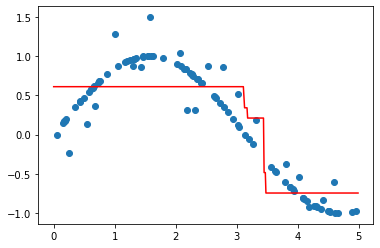

In [ ]:
# Answer
reg = # Put your answer here 
# Put your answer here 
y_pred = # Put your answer here 

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, 'r')

Analyze the behavior of the prediction curve and of the test error with respect to the maximal depth of decision trees and to the number of base regressors.

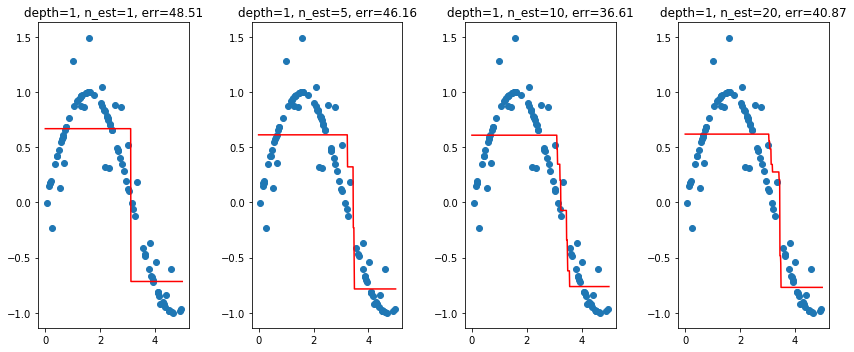

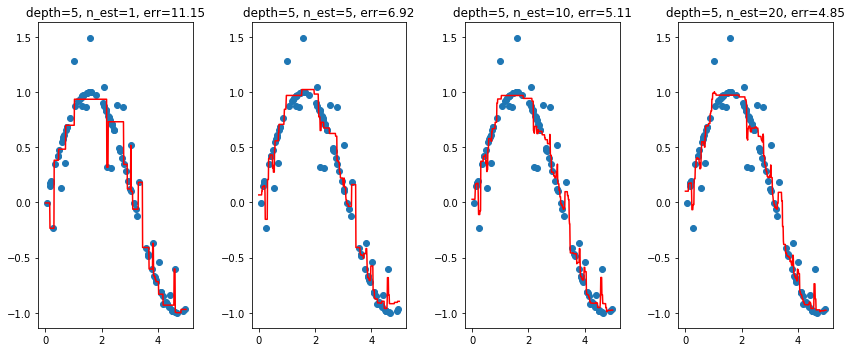

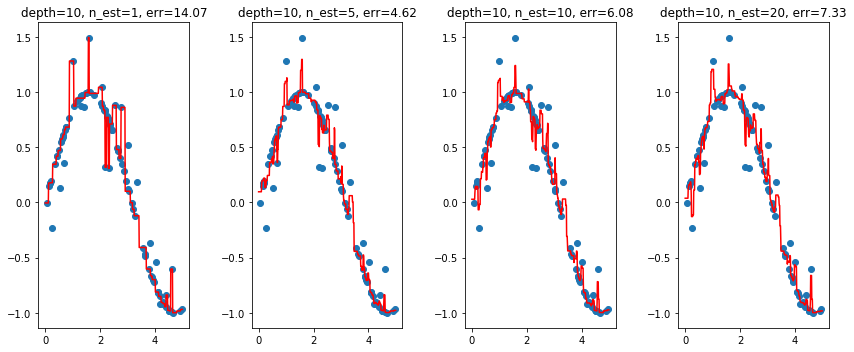

In [ ]:
# Answer
for depth in [1, 5, 10]:
    plt.figure(figsize=(12, 5))
    for it, T in # Put your answer here 
        reg = # Put your answer here 
        # Put your answer here 
        y_pred = # Put your answer here 

        plt.subplot(1, 4, it+1)
        plt.scatter(X_train, y_train)
        plt.plot(X_test, y_pred, 'r')
        plt.title("depth={0}, n_est={1}, err={2:0.2f}".format(depth, T,
                                                              reg.error(X_test, y_test)))
    plt.tight_layout()

We consider decision trees with *max\_depth = 5*.
Plot two curves (one with bootstrap and one with 25%-subsampling) showing the test error with respect to the number of base regressors.
What can we conclude?

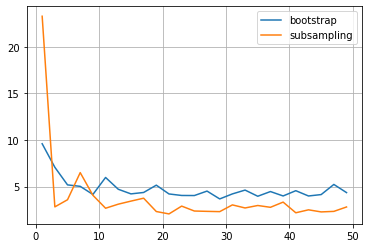

In [ ]:
# Answer
depth = 5

estim = np.arange(1, 50, step=2)
for name, reg in [("bootstrap", BaggingTree(max_depth=depth, max_samples=1)),
                  ("subsampling", BaggingTree(max_depth=depth, max_samples=0.25))]:
    error = []
    for T in estim:
        reg.n_estimators = # Put your answer here 
        # Put your answer here 
        error.append(reg.error(X_test, y_test))
    plt.plot(estim, error, label=name)
plt.legend(loc="best")
plt.grid()

## Random forests

Random forests are bagged trees: for binary classification, a random forest is
$$
    g_n^T(x) = \operatorname{sign} \left( \frac{1}{T} \sum_{t=1}^T g_t(x) \right),
$$
where the base classifiers $(g_1, \dots, g_T)$, with $g_t \colon \mathbb R^d \to \{\pm 1\}$, are learned quasi-independently by bootstrap.

However, in order to enforce the independent learning, each decision tree $g_t$ owns an additional randomization step in its learning procedure:

1. at each cell, select a subset of features at random;
1. find the best pair (feature, threshold) for splitting.

The following script loads and preprocesses the [diabetes dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html).
Explain each step and indicate its purpose.

Is it useful for decision trees?

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

scaler = StandardScaler() # not necessary here 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train.reshape(-1, 1))[:, 0]
y_test = scaler.transform(y_test.reshape(-1, 1))[:, 0]

On the [diabetes dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html), compare scikit-learn [bagging](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html) (with bootstrap and 25%-subsampling) and [random forests](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).
For this purpose, consider *max\_depth = 5* and plot three curves showing the regression score for the test set with respect to the number of base regressors.
What can we conclude?

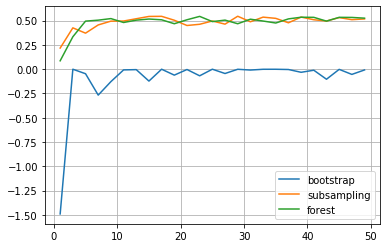

In [ ]:
# Answer
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

depth = 5
params = {"max_depth": depth}

estim = np.arange(1, 50, step=2)
for name, reg in [("bootstrap", BaggingRegressor(base_estimator=DecisionTreeRegressor(**params),
                                                 max_samples=1)),
                  ("subsampling", BaggingRegressor(base_estimator=DecisionTreeRegressor(**params),
                                                   bootstrap=False,
                                                   max_samples=0.25)),
                  ("forest", RandomForestRegressor(**params))]:
    score = []
    for T in estim:
        reg.n_estimators = # Put your answer here 
        # Put your answer here 
        score.append(reg.score(X_test, y_test))
    plt.plot(estim, score, label=name)
plt.legend(loc="best")
plt.grid()

   ### Comparison between decision function, random forests, and extra trees
   
   
   We are going to compare 
   1. Decision function methods
   + Random forest
   + Extra trees
   
on the data sets that we already generated (moon / circles /linearly separable)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

h = .02  # step size in the mesh

n_samples = 200
X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(79)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(n_samples=n_samples, noise=0.3, random_state=13),
            make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=17),
            linearly_separable
            ]


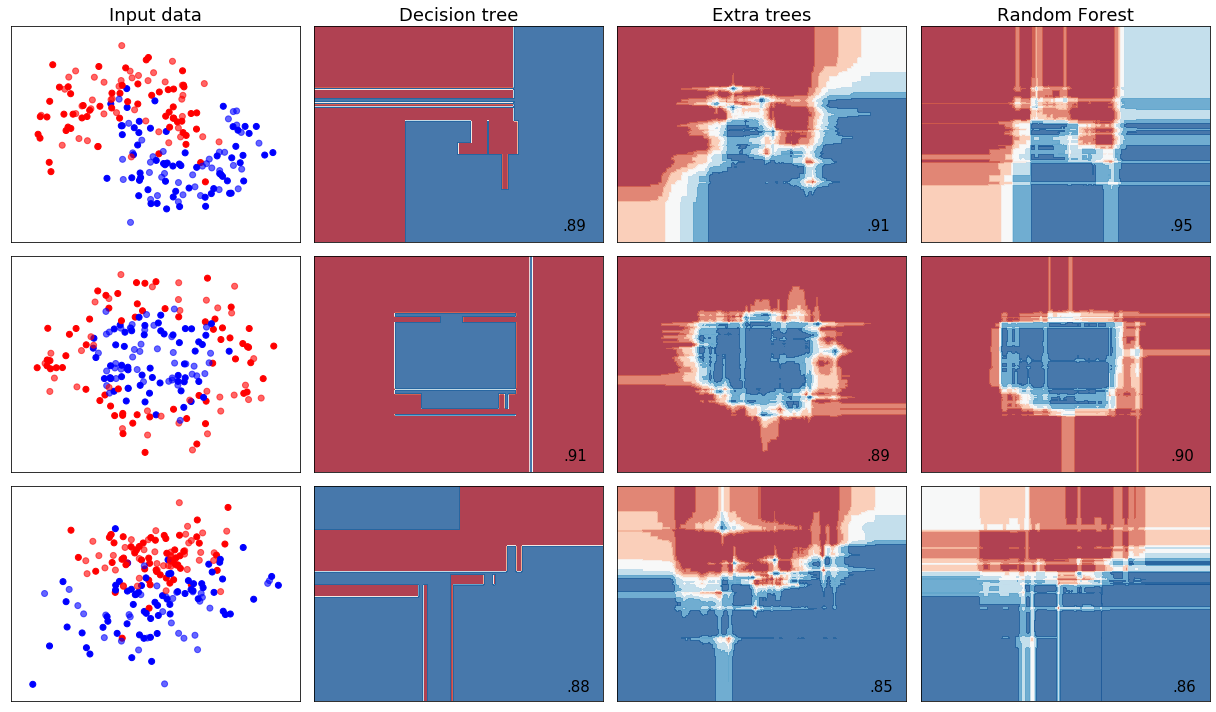

In [ ]:



names = ["kNN", "Linear SVM", "RBF SVM", "Random Forest"]
classifiers = [
    KNeighborsClassifier(),
    LinearSVC(),
    SVC(kernel='rbf', degree=2),
    RandomForestClassifier()]

names = ["Decision tree", "Extra trees", "Random Forest"]

classifiers = [
    DecisionTreeClassifier(),
    ExtraTreesClassifier(n_estimators=50),
    RandomForestClassifier(n_estimators=50)
]


figure = plt.figure(figsize=(17, 10))
i = 1

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data", fontsize=18)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        #ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
        #           alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, fontsize=18)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()

### Model selection

Load the [digits classification dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits), split it randomly and preprocess it similarly to the diabetes dataset (be careful, we are now handling a classification dataset).

In [ ]:
# Answer
from sklearn.datasets import load_digits

data = load_digits()
X_train, X_test, y_train, y_test = # Put your answer here with test_size=0.2

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We aim at comparing three models based on the [digits classification dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits):
1. [gradient boosting](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html);
1. [random forests](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html);
1. [logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

For each model, some possible values of parameters are defined below.
Explain the role of these parameters.

In [ ]:
# Grid parameters
tree_params = {"max_depth": [5, 10, 15],
              "n_estimators": [10, 100]}  # Parameters for random forests
gb_params = tree_params.copy()  # Parameters for gradient boosting
gb_params.update({"learning_rate": np.logspace(-2, 0, num=3),
                 "max_features": [0.1]})
lr_params = {"C": np.logspace(-3, 3, num=7)}  # Parameters for logistic regression

With the training set previously generated, perform a [grid search](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) in order to determine "good" parameters among the ones proposed above.
Compare the test scores of the models trained with the "best" parameters.

In [ ]:
# Auxiliary parameters
gs_params = {"cv": 3, "n_jobs": -1, "verbose": 1}

In [ ]:
# Answer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

scores = []
for name, clf, params in [("Gradient boosting", GradientBoostingClassifier(), gb_params),
                          ("Random forest", RandomForestClassifier(), tree_params),
                          ("Logistic regression", LogisticRegression(), lr_params)]:
    grid = # Put your answer here 
    grid.fit(X_train, y_train)
    scores.append((name, grid.score(X_test, y_test), grid.best_params_))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   55.1s finished


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.3s finished


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.6s finished


In [ ]:
# Answer
# Put your answer here 

Score Gradient boosting: 0.97	 {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 0.1, 'n_estimators': 100}
Score Random forest: 0.97	 {'max_depth': 10, 'n_estimators': 100}
Score Logistic regression: 0.96	 {'C': 1.0}


The general pattern of this numerical experiment is:
1. spliting randomly the dataset;
1. preprocessing it;
1. finding suitable parameters by grid search;
1. assessing the generalization error.

Repeat this experiment 20 times and record the score for each method and each run.
Print the mean score and the standard deviation for each method.

In [ ]:
# Answer
gs_params = {"cv": 3, "n_jobs": -1, "verbose": 0}

scores = []
for run in range(20):
    # Print
    print("Run", run)
    
    # Dataset
    X_train, X_test, y_train, y_test = # Put your answer here with test_size=0.2

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Score saving
    scores.append([])
    
    # Grid search
    for name, clf, params in [("Gradient boosting", GradientBoostingClassifier(), gb_params),
                          ("Random forest", RandomForestClassifier(), tree_params),
                          ("Logistic regression", LogisticRegression(), lr_params)]:
        grid = GridSearchCV(estimator=clf, param_grid=params, **gs_params)
        grid.fit(X_train, y_train)
        scores[-1].append(grid.score(X_test, y_test))

Run 0
Run 1
Run 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Run 3
Run 4


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19


In [ ]:
# Answer
scores = # Put your answer here 
print("\t{}\t{}\t{}".format("Gradient boosting", "Random forest", "Logistic regression"))
print("Mean\t{}\t{}\t{}".format(*scores.mean(axis=0)))
print("Std\t{}\t{}\t{}".format(*scores.std(axis=0)))

	Gradient boosting	Random forest	Logistic regression
Mean	0.977222222222222	0.9740277777777779	0.9680555555555556
Std	0.00763762615825974	0.006931933174148743	0.00618016540591303


Perform a [Wilcoxon signed-rank test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html) to assess the difference between the mean scores of Gradient boosting and random forests.

In [ ]:
# Answer
from scipy.stats import wilcoxon

print("Gradient boosting vs random forest:", wilcoxon(scores[:, 0], scores[:, 1]))

Gradient boosting vs random forest: WilcoxonResult(statistic=34.5, pvalue=0.04510273985579741)
